# Reporting on Sales Data [Motorcycle Parts]

## Background
We work for a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

We’ve suggested helping our colleagues analyze past sales data. 

### Research questions
Create a report to answer questions and add plots to visualize findings. Include:

1. What are the total sales for each payment method? 
2. What is the average unit price for each product line? 
3. What is the average purchase value by client type?
4. What is the total purchase value by product line?
5. What is the total purchase value for each week day?
6. What is the average purchase value for each month?
7. What is the total purchase value for every warehouse?
8. Correlation of variables.
9. Time Series graphs for total and cumulative sales.
10. Predict total sales revenue [Using Linear Regression].

### Data description

The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## Import modules and data

The analysis will commence with importing all the necessary python packages. We will also take a quick view on what our data looks like.

In [73]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression

In [74]:
# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [75]:
# Information on table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [76]:
# Describe numeric columns
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


For further analysis, extract Month and Week_day from the data.

In [77]:
# Extract week day from date and create new column 'week_day'
df["week_day"]=df["date"].dt.day_name()

# Extract month from date and create new column 'month'
df["month"]=df["date"].dt.month_name()

In [78]:
# Check new columns
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,week_day,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,Tuesday,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,Tuesday,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,Tuesday,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,Tuesday,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,Tuesday,June


## Analysis 


### 1. What are the total sales for each payment method?

To find the total sales for each payment method, we'll follow these steps: 
- determine all unique payment methods;
- find total sales sum by each payment method;
- visualize the data.

In [79]:
# Group by 'payment' and calculate total sales
total_sales = df.groupby('payment')[['total']].sum().reset_index()
total_sales

,payment,total
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


In [80]:
# Create bar chart
fig = px.bar(total_sales,
             x="payment",
             y="total",
             title="<b>Total sales for each payment method</b>",
             labels={"payment": "Type of Payment", "total": "Total sales"})

# Set size
fig.update_layout(width=600, height=400) 

# Show the plot
fig.show()

![image](image.png)


### 2. What is the average unit price for each product line?

To find the average unit price per each product line, we'll follow these steps:
- determine all unique product lines;
- calculate the mean of total sales by each product line;
- visualize the data.

In [81]:
# Group by 'product_line' and calculate mean unit price rounded to 2 decimal places
avg_unit_price = round(df.groupby('product_line')[['unit_price']].mean(), 2)

# Reset the index to make 'product_line' a column
avg_unit_price = avg_unit_price.reset_index()

# Show the table
avg_unit_price

,product_line,unit_price
0,Breaking system,17.74
1,Electrical system,25.59
2,Engine,60.09
3,Frame & body,42.83
4,Miscellaneous,22.81
5,Suspension & traction,33.97


In [82]:
# Create bar chart 
fig = px.bar(avg_unit_price,
             x="product_line",
             y="unit_price",
             title="<b>Average unit price for each product line</b>",
             labels={"product_line": "Product Line", "unit_price": "Average unit price"})

# Set size
fig.update_layout(width=900, height=400) 

# Show the plot
fig.show()

![image-2](image-2.png)


### 3. What is the average purchase value by client type?

To find the average purchase value by client type, we'll follow these steps:

- determine all unique client types;
- calculate the mean of total sales by each client type;
- visualize the data.

In [83]:
# Group by 'client_type' and calculate average purchase, reset the index to make 'client_type' a column
avg_purchase_value = round(df.groupby('client_type')[['total']].mean(), 2).reset_index()
avg_purchase_value

,client_type,total
0,Retail,167.06
1,Wholesale,709.52


In [84]:
# Create bar chart trace
fig = px.bar(avg_purchase_value,
             x="client_type",
             y="total",
             title="<b>Average purchase value by client type</b>",
             labels={"client_type": "Client Type", "total": "Average purchase value"})

# Set size
fig.update_layout(width=500, height=400) 

# Show the plot
fig.show()

![image-4](image-4.png)


### 4. What is the total purchase value by product line?

To find the total purchase value by product line, we'll follow these steps:

- determine all unique product lines;
- find total purchase value by each product line;
- visualize the data.

In [85]:
# Group by 'product_line' and calculate total sales
total_purchase_value = round(df.groupby('product_line')[['total']].sum(), 0)

# Reset the index to make 'product_line' a column
total_purchase_value = total_purchase_value.reset_index()

# Show the table
total_purchase_value

,product_line,total
0,Breaking system,38350.0
1,Electrical system,43613.0
2,Engine,37945.0
3,Frame & body,69025.0
4,Miscellaneous,27166.0
5,Suspension & traction,73014.0


In [86]:
# Create bar chart
fig = px.bar(total_purchase_value,
             x="product_line",
             y="total",
             title="<b>Total purchase value by product line</b>",
             labels={"product_line": "Product line", "total": "Total purchase value"})

# Set size
fig.update_layout(width=900, height=400) 

# Show the plot
fig.show()

![image-5](image-5.png)


### 5. What is the total purchase value for each week day?

To find the total purchase value by week day, we'll follow these steps:
- determine all unique days of week;
- find total purchase value by each week day;
- visualize the data.

In [87]:
# Group by 'week_day' and calculate total sales
weekday_avg_sales = round(df.groupby('week_day')[['total']].mean(), 2).sort_values(by="total")

# Reset the index to make 'product_line' a column
weekday_avg_sales = weekday_avg_sales.reset_index()

# Show the table
weekday_avg_sales

,week_day,total
0,Thursday,255.90
1,Wednesday,271.68
2,Monday,272.45
3,Saturday,275.09
4,Friday,290.01
5,Sunday,309.41
6,Tuesday,343.76


In [88]:
# Create bar chart
fig = px.bar(weekday_avg_sales,
             x="week_day",
             y="total",
             title="<b>Average purchase value by week day</b>",
             labels={"week_day": "Week day", "total": "Average purchase value"})

# Set size
fig.update_layout(width=900, height=500) 

# Show the plot
fig.show()

![image-6](image-6.png)


### 6. What is the average purchase value for each month?

To find the average purchase value by month, we'll follow these steps:
- determine all unique months;
- find average purchase value by each week day;
- visualize the data.

In [89]:
# Group by 'month' and calculate average sales
month_avg_sales = round(df.groupby('month')[['total']].mean(), 2).sort_values(by="total")

# Reset the index to make 'product_line' a column
month_avg_sales = month_avg_sales.reset_index()

# Show the table
month_avg_sales

,month,total
0,July,271.15
1,June,282.01
2,August,316.23


In [90]:
# Create bar chart
fig = px.bar(month_avg_sales,
             x="month",
             y="total",
             title="<b>Average purchase value by month</b>",
             labels={"month": "Month", "total": "Average purchase value"})

# Set size
fig.update_layout(width=600, height=500) 

# Show the plot
fig.show()

![image-7](image-7.png)


### 7. What is the total purchase value for every warehouse?

To find the total purchase value by warehouse, we'll follow these steps:
- determine all unique warehouses;
- find total purchase value by warehouse;
- visualize the data.

In [91]:
# Group by 'warehouse' and calculate total sales
total_sales_warehouse = round(df.groupby('warehouse')[['total']].sum(), 2).sort_values(by="total")

# Reset the index to make 'product_line' a column
total_sales_warehouse = total_sales_warehouse.reset_index()

# Show the table
total_sales_warehouse

,warehouse,total
0,West,46926.49
1,North,100203.63
2,Central,141982.88


In [92]:
# Create bar chart
fig = px.bar(total_sales_warehouse,
             x="warehouse",
             y="total",
             title="<b>Total purchase value by warehouse</b>",
             labels={"warehouse": "Warehouse", "total": "Total purchase value"})

# Set size
fig.update_layout(width=600, height=400) 

# Show the plot
fig.show()

![image-8](image-8.png)

### 8. Correlation
Let's see correlation between 3 metrics of value (quantity, unit_price, and total) against one another using the following ways: 
- correlation matrix table;
- correlation heatmap chart;
- pair plots.

In [93]:
# Compute correlation matrix table
corr_matrix = df.corr()
print(corr_matrix)

            quantity  unit_price     total
quantity    1.000000    0.035822  0.870207
unit_price  0.035822    1.000000  0.372942
total       0.870207    0.372942  1.000000


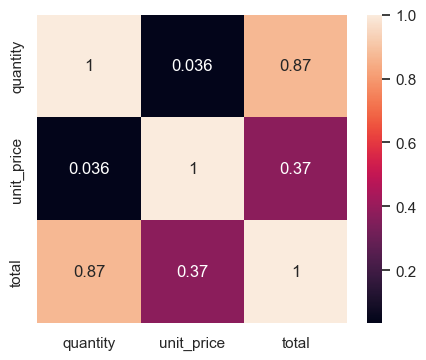

In [94]:
# Create correlation heatmap chart
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Observed correlations from correlation matrix and heatmap chart: 
- "total" and "quantity" are highly correlated;
- "total" and "unit_price" are significantly correlated.

Let's see pair plots using "product_line" value as a parameter. 

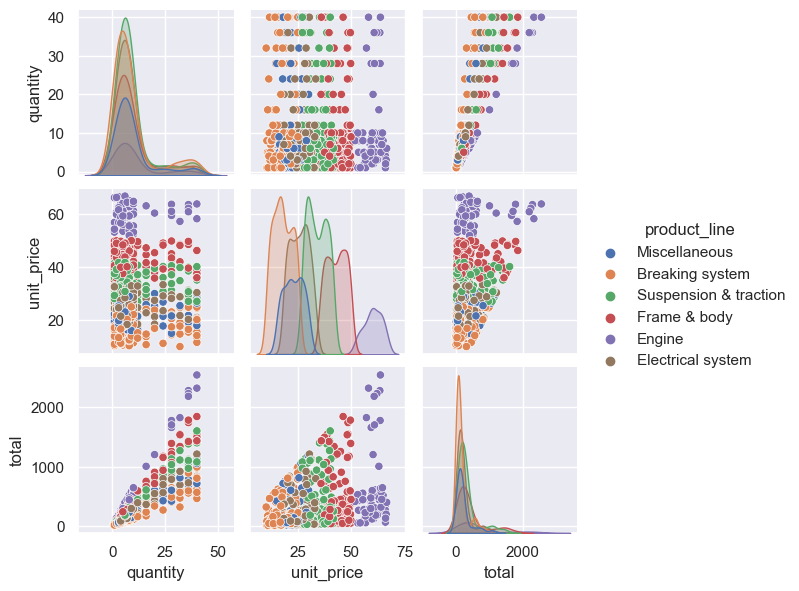

In [95]:
# Scatter plot correlation matrix for product_line
sns.set()
sns.pairplot(df, hue='product_line', height=2, aspect=1)
plt.show()

These pair plots do allow us to see the relative spread of the unit price of each product line in the center graph. The smallest volume of sales are in Engine, yet they are of a higher unit price. Breaking systems are the least expensive, and with the second highest volume sold, account for a greater portion of total sales revenue. 

It is still difficult to realize the cumulative relative total revenues of each product line through this method. This is meant to be a preliminary analysis, so we can take a look at some other graphics to understand the data.

Let's try looking at the data with a different variable - by client type.

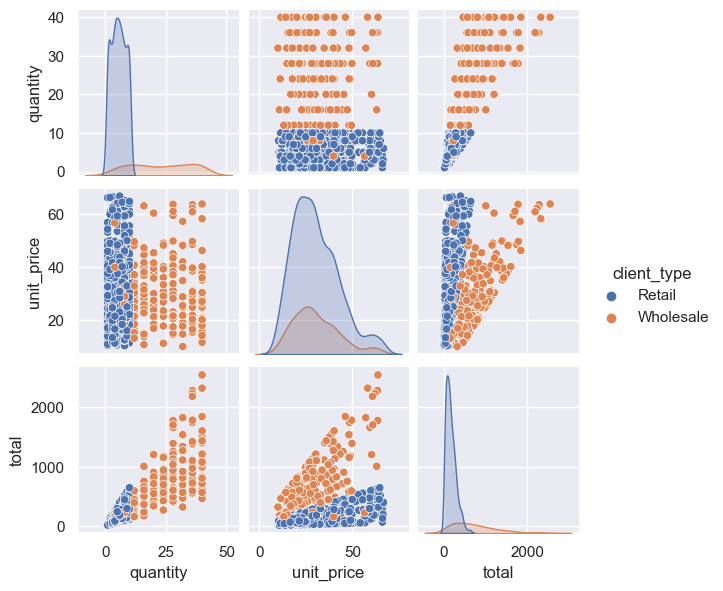

In [96]:
# Scatter plot correlation matrix for client_type
sns.set()
sns.pairplot(df, hue='client_type', height=2, aspect=1)
plt.show()

We see that retail customers account for the highest volume of sales. Their quantity of purchase does not go above around 10, where as wholesale purchases are made at any quantity. 

### 9. Time Series graphs per product line

#### 9.1. Total sales

There seems to be more worth in assessing data on a per product line basis. It would be interesting to see how this data looks like with time. We can graph a time series of the sales on a per product line basis to begin the analysis.

In [97]:
timeseries_productline_total = df.groupby(['date','product_line'],as_index = False)[['total']].sum()

In [98]:
Breaking_system = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Breaking system')
Electric_system = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Electrical system')
Engine = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Engine')
Frame_body = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Frame & body')
Sus_trac = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Suspension & traction')
Misc = timeseries_productline_total.groupby('product_line',as_index = False).get_group('Miscellaneous')

array = [Breaking_system, Electric_system, Engine, Frame_body, Sus_trac, Misc]

for a in array:
    b = a["total"].cumsum()
    a["cumTotal"] = b.to_list()

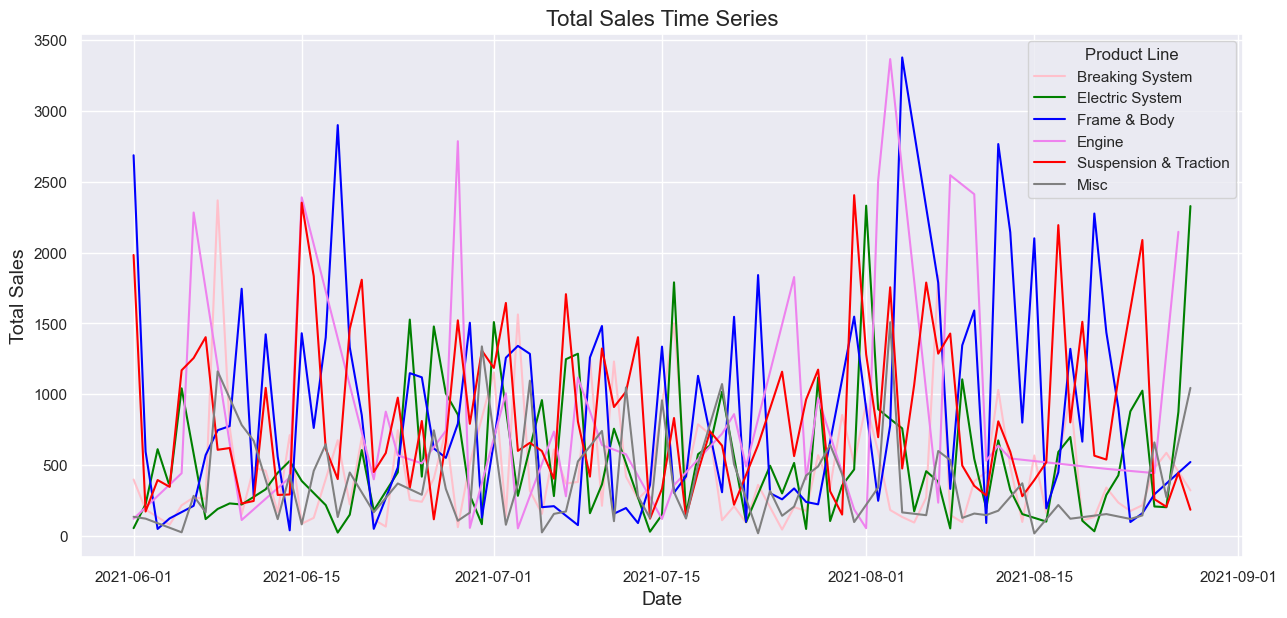

In [99]:
plt.figure(figsize=[15,6.8])
plt.plot(Breaking_system.date,Breaking_system.total,label = "Breaking System", color = "pink")
plt.plot(Electric_system.date,Electric_system.total,label = "Electric System", color = "green")
plt.plot(Frame_body.date,Frame_body.total,label = "Frame & Body", color = "blue")
plt.plot(Engine.date,Engine.total,label = "Engine", color = "violet")
plt.plot(Sus_trac.date,Sus_trac.total,label = "Suspension & Traction", color = "red")
plt.plot(Misc.date,Misc.total,label = "Misc", color = "gray")

plt.legend(title='Product Line')

plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Total Sales Time Series', fontsize=16)

plt.show()

#### 9.2. Cumulative Time Series graphs to analyze data per product line

This data is not easy to analyze with a simple time series: the overlaps and consistent ups and downs make the image difficult to decipher. There may be more sense to draw from it on a cumulative total revenues basis. Let's convert this data and present it in the cumulative fashion shown in the graph underneath.

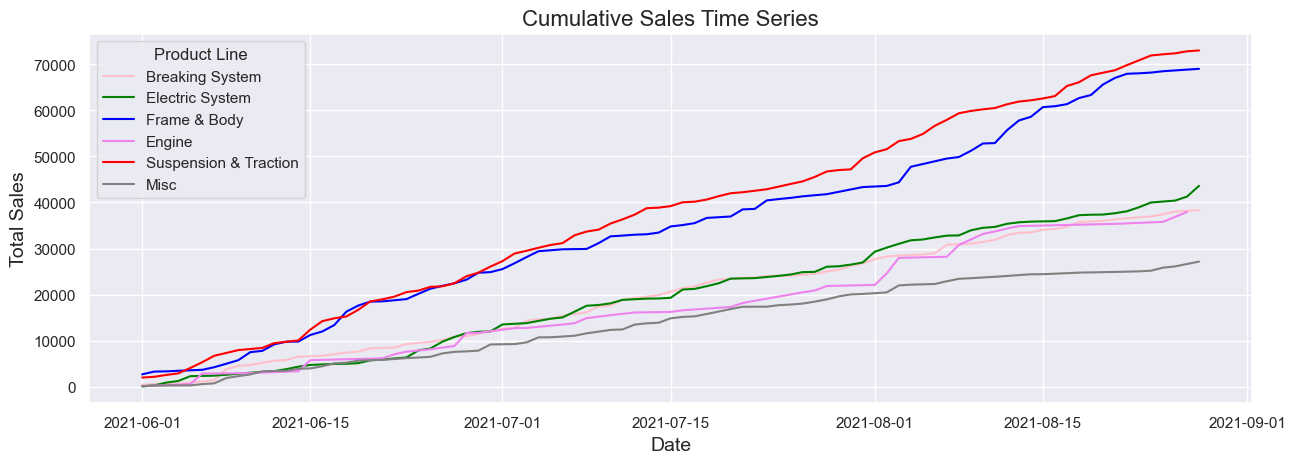

In [100]:
plt.figure(figsize=[15,4.8])
plt.plot(Breaking_system.date,Breaking_system.cumTotal,label = "Breaking System", color = "pink")
plt.plot(Electric_system.date,Electric_system.cumTotal,label = "Electric System", color = "green")
plt.plot(Frame_body.date,Frame_body.cumTotal,label = "Frame & Body", color = "blue")
plt.plot(Engine.date,Engine.cumTotal,label = "Engine", color = "violet")
plt.plot(Sus_trac.date,Sus_trac.cumTotal,label = "Suspension & Traction", color = "red")
plt.plot(Misc.date,Misc.cumTotal,label = "Misc", color = "gray")

plt.legend(title='Product Line')

plt.ylabel('Total Sales', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Cumulative Sales Time Series', fontsize=16)

plt.show()

The image is much more clear, and we can see that revenues gained from Suspension & Traction as well as Frame & Body products are more lucrative than any other product.

### 10. Predict Total Sales Revenue Until the End of 2021 [Using Linear Regression]

It might be interesting to see how these products will be forecasted to perform until the end of 2021. Given the linear increases, we can apply a linear regression model to the data to generate some forecasts on a per product basis.

In [101]:
X_Sus_trac = Sus_trac[['date']]
X_Sus_trac.shape

X_Electric_system = Electric_system[['date']]
X_Electric_system.shape

X_Breaking_system = Breaking_system[['date']]
X_Breaking_system.shape

X_Frame_body = Frame_body[['date']]
X_Frame_body.shape

X_Engine = Engine[['date']]
X_Engine.shape

X_Misc = Misc[['date']]
X_Misc.shape;

In [102]:
X_Sus_trac = Sus_trac['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Sus_trac = Sus_trac[['cumTotal']]

X_Electric_system = Electric_system['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Electric_system = Electric_system[['cumTotal']]

X_Breaking_system = Breaking_system['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Breaking_system = Breaking_system[['cumTotal']]

X_Frame_body = Frame_body['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Frame_body = Frame_body[['cumTotal']]

X_Engine = Engine['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Engine = Engine[['cumTotal']]

X_Misc = Misc['date'].map(dt.datetime.toordinal).values.reshape(-1,1)
y_Misc = Misc[['cumTotal']]

In [103]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [104]:
variable_Names = ["Sus_trac","Electric_system","Breaking_system","Frame_body","Engine","Misc"]
model_Array_X = [X_Sus_trac, X_Electric_system, X_Breaking_system, X_Frame_body, X_Engine, X_Misc]
model_Array_Y = [y_Sus_trac, y_Electric_system, y_Breaking_system, y_Frame_body, y_Engine, y_Misc]

X_pred_orig = pd.date_range(start='2021-08-28', end='2021-12-30')
X_pred = X_pred_orig.map(dt.datetime.toordinal)
X_pred = X_pred.values.reshape(-1,1)

diction = {}
i = 0
for j in range(0,6): 
    
    name = "model" + variable_Names[i]
    nameX = "modelX_" + variable_Names[i]
    nameY = "modelY_" + variable_Names[i]
    model = LinearRegression()
    model.fit(model_Array_X[i],model_Array_Y[i])
    y_pred = model.predict(X_pred)
    datess = pd.DataFrame(X_pred_orig).rename(columns = {0:"Date"})
    predss = pd.DataFrame(y_pred).rename(columns = {0:"cumTotal"})
    diction[name] = pd.DataFrame({nameX: datess["Date"], nameY: predss["cumTotal"]})
    del model
    i = i + 1

In [105]:
modelSusTrac = diction['modelSus_trac']
modelElectricSys = diction['modelElectric_system']
modelBreaking = diction['modelBreaking_system']
modelFrameBody = diction['modelFrame_body']
modelEngine = diction['modelEngine']
modelMisc = diction['modelMisc']

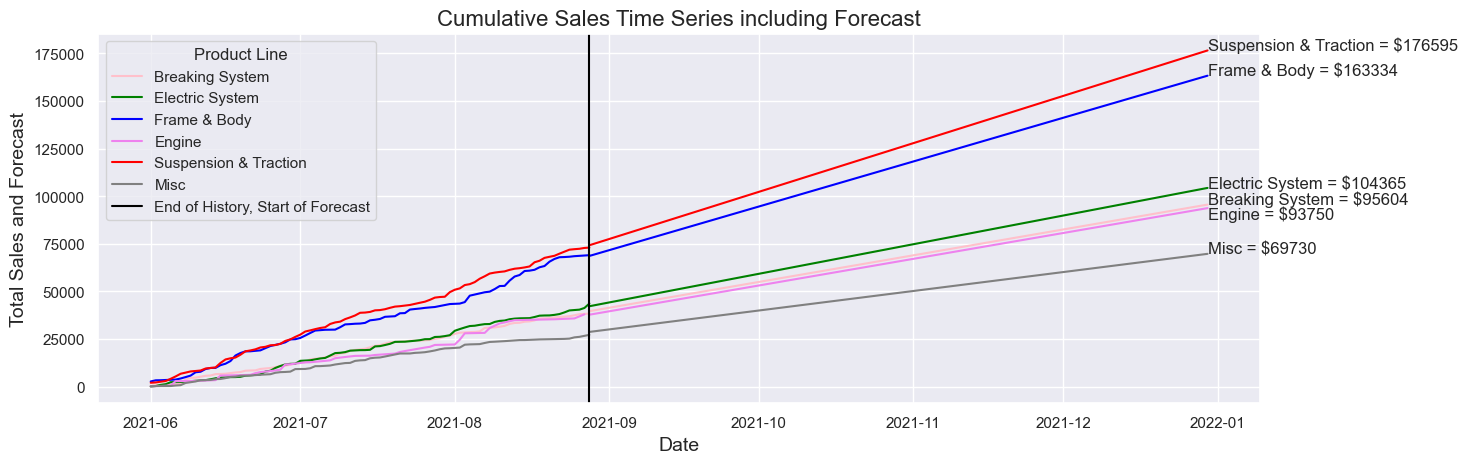

In [106]:
plt.figure(figsize=[15,4.8])
plt.plot(Breaking_system.date,Breaking_system.cumTotal,label = "Breaking System", color = "pink")
plt.plot(Electric_system.date,Electric_system.cumTotal,label = "Electric System", color = "green")
plt.plot(Frame_body.date,Frame_body.cumTotal,label = "Frame & Body", color = "blue")
plt.plot(Engine.date,Engine.cumTotal,label = "Engine", color = "violet")
plt.plot(Sus_trac.date,Sus_trac.cumTotal,label = "Suspension & Traction", color = "red")
plt.plot(Misc.date,Misc.cumTotal,label = "Misc", color = "gray")

plt.plot(modelBreaking.modelX_Breaking_system,modelBreaking.modelY_Breaking_system, color = "pink")
plt.plot(modelElectricSys.modelX_Electric_system,modelElectricSys.modelY_Electric_system, color = "green")
plt.plot(modelFrameBody.modelX_Frame_body,modelFrameBody.modelY_Frame_body, color = "blue")
plt.plot(modelEngine.modelX_Engine,modelEngine.modelY_Engine, color = "violet")
plt.plot(modelSusTrac.modelX_Sus_trac,modelSusTrac.modelY_Sus_trac, color = "red")
plt.plot(modelMisc.modelX_Misc,modelMisc.modelY_Misc, color = "gray")
plt.axvline(x=modelBreaking.modelX_Breaking_system[0], color = "black", label = "End of History, Start of Forecast")

plt.text(modelBreaking.iloc[-1][0],modelBreaking.iloc[-1][1],"Breaking System = $" + str(round(modelBreaking.iloc[-1][1])))
plt.text(modelElectricSys.iloc[-1][0],modelElectricSys.iloc[-1][1],"Electric System = $" + str(round(modelElectricSys.iloc[-1][1])))
plt.text(modelFrameBody.iloc[-1][0],modelFrameBody.iloc[-1][1],"Frame & Body = $" + str(round(modelFrameBody.iloc[-1][1])))
plt.text(modelEngine.iloc[-1][0],modelEngine.iloc[-1][1]-6000,"Engine = $" + str(round(modelEngine.iloc[-1][1])))
plt.text(modelSusTrac.iloc[-1][0],modelSusTrac.iloc[-1][1],"Suspension & Traction = $" + str(round(modelSusTrac.iloc[-1][1])))
plt.text(modelMisc.iloc[-1][0],modelMisc.iloc[-1][1],"Misc = $" + str(round(modelMisc.iloc[-1][1])))

plt.legend(title='Product Line')

plt.ylabel('Total Sales and Forecast', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Cumulative Sales Time Series including Forecast', fontsize=16)

plt.show()

The results for the cumulative sales total until the end of 2021 are in the graph above. The graph contains the historical data on a per product line basis, which ends towards the end of August 2021 (highlighted by the vertical black line). After this comes the forecast. All projections move upward, and we can see each product lines expected revenues at the end of the year on the graph as well.